In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={"figure.figsize": (12.,6.)})
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('measurements.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data[['temp_inside']]=data[['temp_inside']].fillna(value=0)

In [4]:
data.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [5]:
data.rain.value_counts()

0    340
1     48
Name: rain, dtype: int64

distance OK
consume OK
speed OK
temp_inside OK
temp_outside OK
specials DROP
refill liters DROP


In [6]:
data.shape

(388, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    388 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
data=data.drop(columns=['refill liters','refill gas','specials'])

In [9]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [10]:
data['distance']=data['distance'].apply(lambda x: x.replace(',','.'))
data['consume']=data['consume'].apply(lambda x: x.replace(',','.'))

data['temp_inside']=pd.to_numeric(data['temp_inside'], errors='coerce')

In [11]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,4.2,30,"21,5",13,E10,0,0,0
2,11.2,5.5,38,"21,5",15,E10,0,0,0
3,12.9,3.9,36,"21,5",14,E10,0,0,0
4,18.5,4.5,46,"21,5",15,E10,0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   388 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [13]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,4.2,30,"21,5",13,E10,0,0,0
2,11.2,5.5,38,"21,5",15,E10,0,0,0
3,12.9,3.9,36,"21,5",14,E10,0,0,0
4,18.5,4.5,46,"21,5",15,E10,0,0,0


In [14]:
data['temp_inside']= data['temp_inside'].apply(lambda x: str(x).replace(',','.'))

In [15]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   388 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [17]:
data=data.astype({'temp_inside':'float','distance':'float','consume':'float'})

In [18]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [19]:
data.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


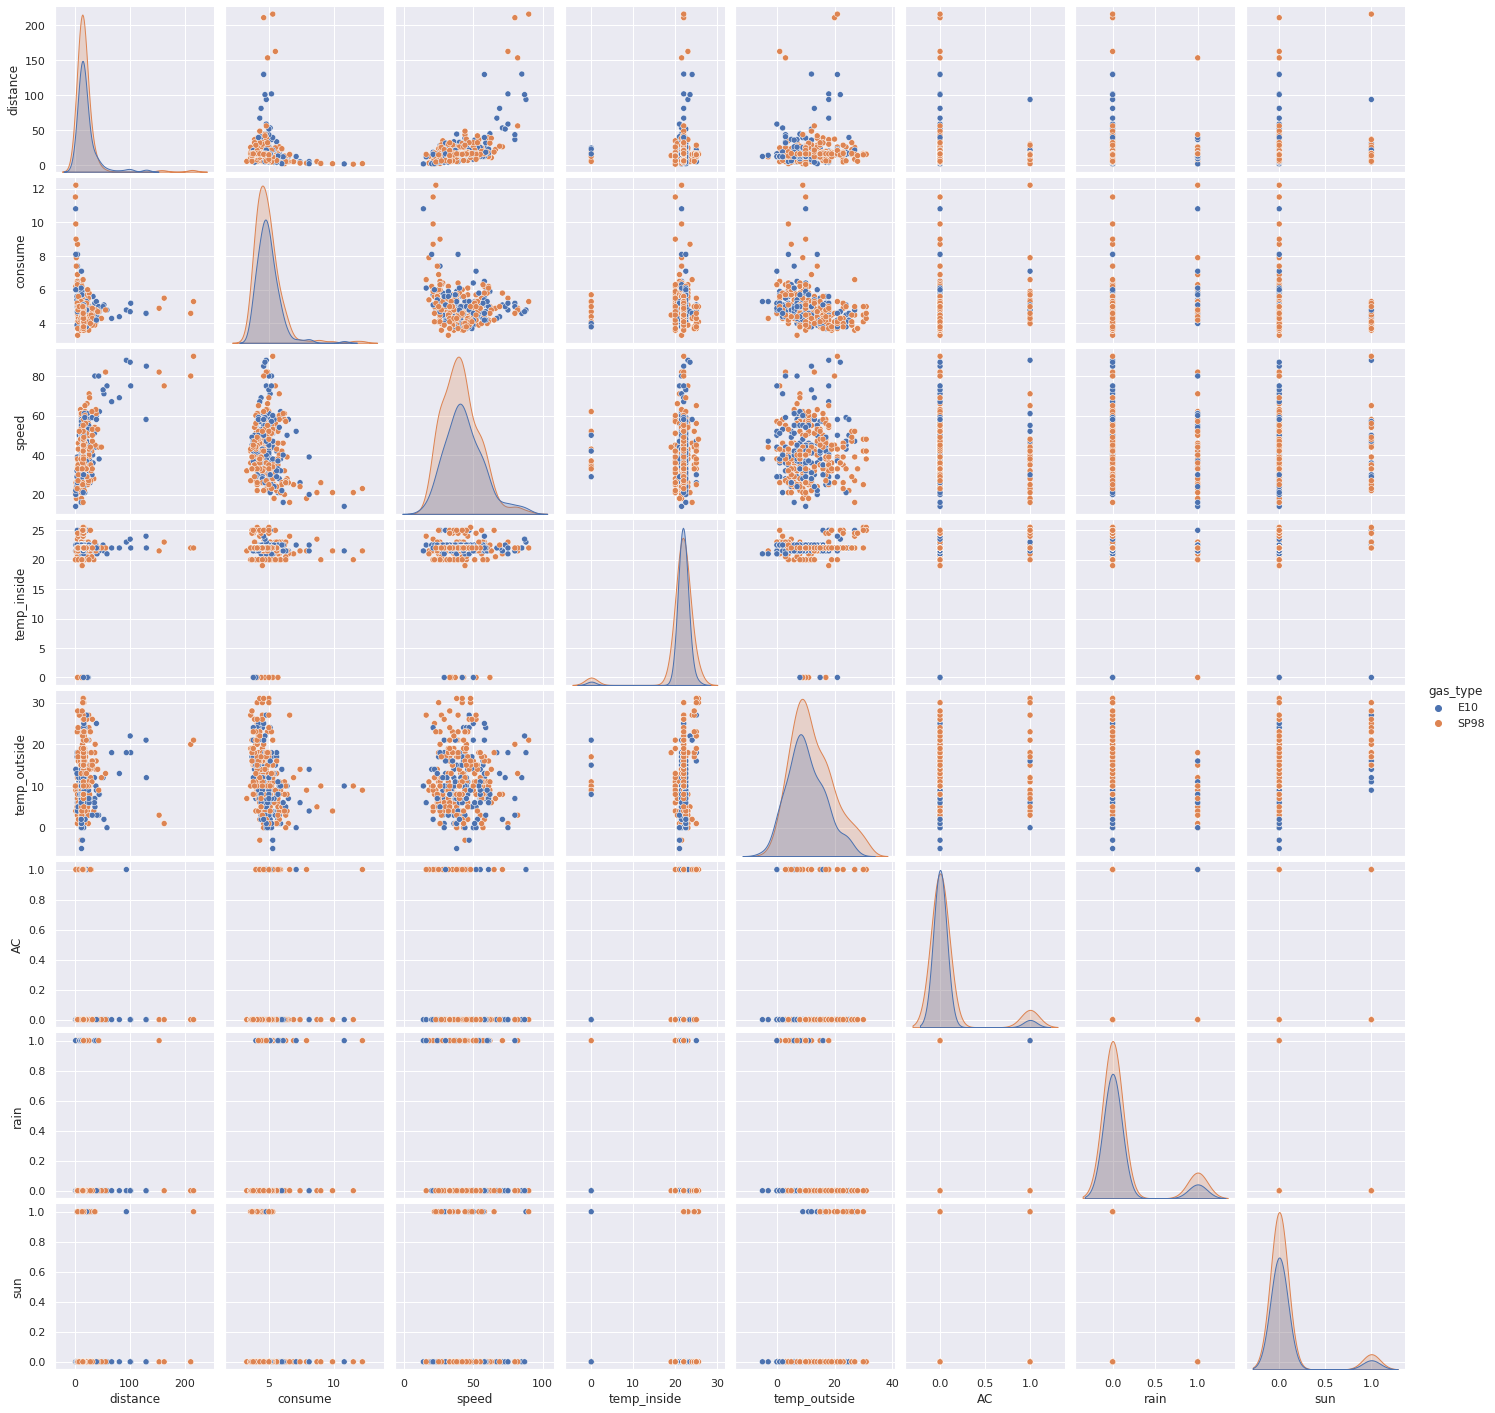

In [21]:
sns.pairplot(data, hue="gas_type");

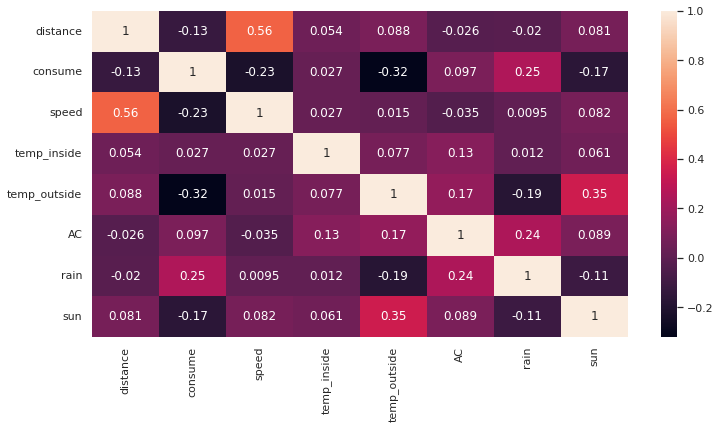

In [22]:
corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(rc={"figure.figsize": (12.,10.)});

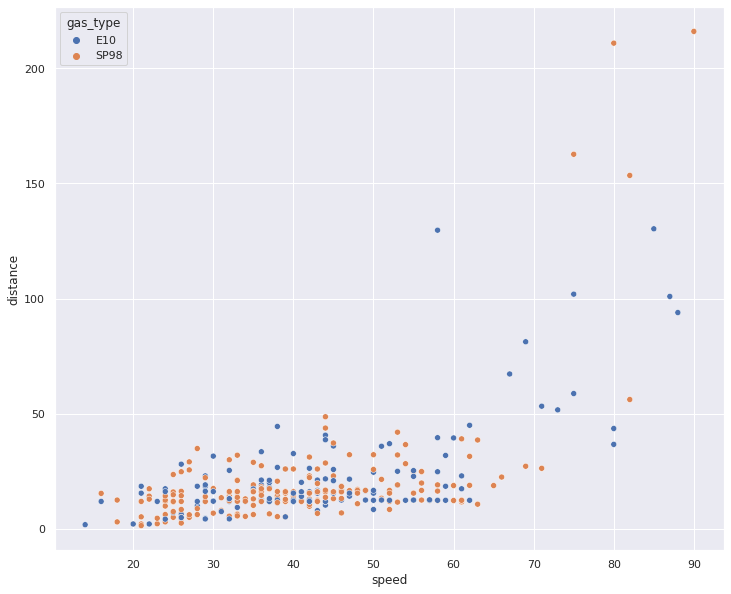

In [23]:
sns.scatterplot(x="speed", y="distance", hue="gas_type",data=data);

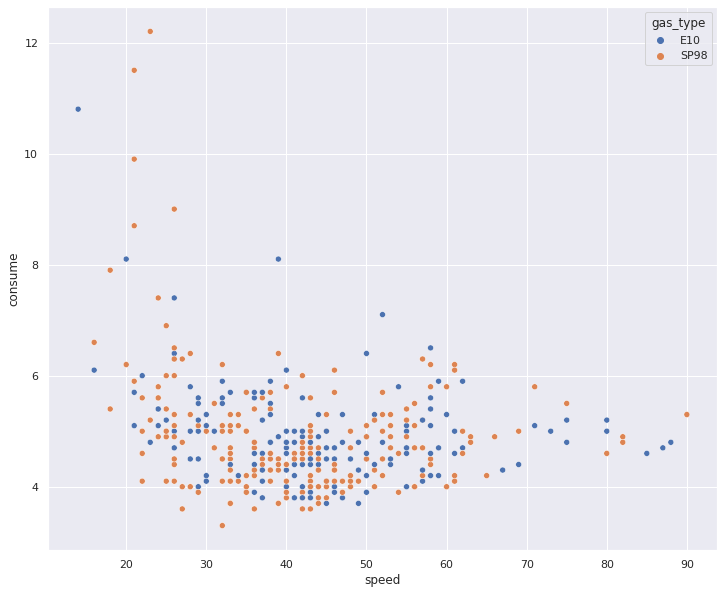

In [24]:
sns.scatterplot(x="speed", y="consume", hue="gas_type",data=data);

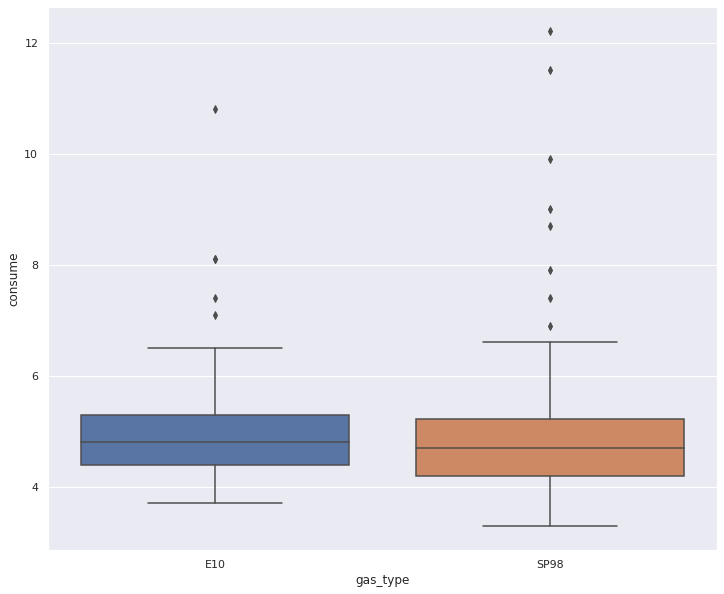

In [25]:
sns.boxplot(x="gas_type", y="consume", data=data);

In [30]:
# el consumo es muy similar entre los dos tipos de gasolina, parece que la SP98 es ligeramente inferior

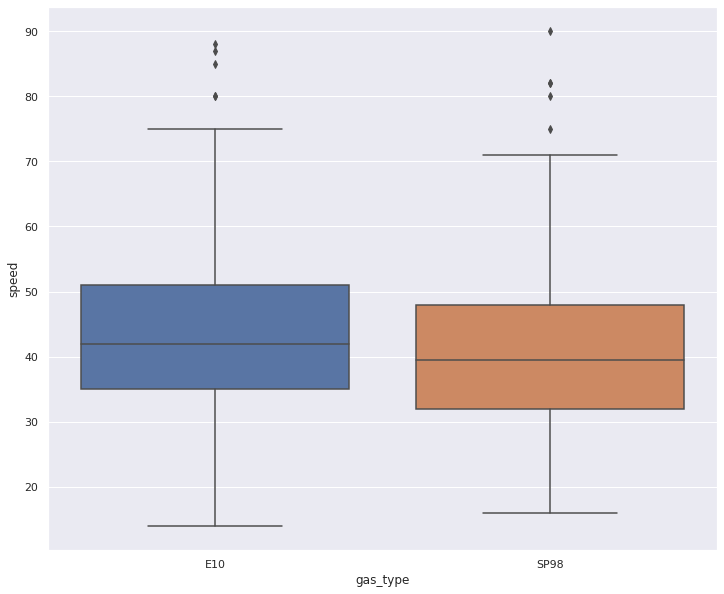

In [31]:
sns.boxplot(x="gas_type", y="speed", data=data);

In [32]:
#los vehículos con E10 van ligeramente más rápido de media

In [26]:
final=pd.get_dummies(data=data,columns=['gas_type'])
final.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0


In [27]:
final.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
distance,1.000000,-0.128967,0.562299,0.053597,0.088175,-0.025738,-0.019791,0.081120,0.053411,-0.053411
consume,-0.128967,1.000000,-0.227866,0.027015,-0.320811,0.096591,0.248118,-0.170667,0.015327,-0.015327
speed,0.562299,-0.227866,1.000000,0.026817,0.015411,-0.035408,0.009489,0.081618,0.097360,-0.097360
temp_inside,0.053597,0.027015,0.026817,1.000000,0.077181,0.125307,0.011845,0.060782,0.054426,-0.054426
temp_outside,0.088175,-0.320811,0.015411,0.077181,1.000000,0.167562,-0.186315,0.346903,-0.148705,0.148705
AC,-0.025738,0.096591,-0.035408,0.125307,0.167562,1.000000,0.242915,0.088598,-0.105285,0.105285
rain,-0.019791,0.248118,0.009489,0.011845,-0.186315,0.242915,1.000000,-0.112650,-0.060328,0.060328
sun,0.081120,-0.170667,0.081618,0.060782,0.346903,0.088598,-0.112650,1.000000,-0.022761,0.022761
gas_type_E10,0.053411,0.015327,0.097360,0.054426,-0.148705,-0.105285,-0.060328,-0.022761,1.000000,-1.000000
gas_type_SP98,-0.053411,-0.015327,-0.097360,-0.054426,0.148705,0.105285,0.060328,0.022761,-1.000000,1.000000


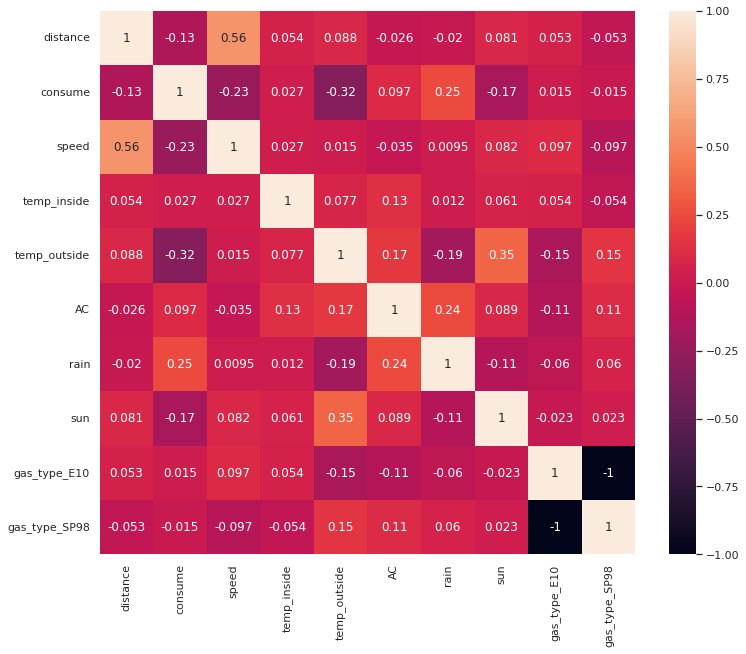

In [28]:
corrMatrix=final.corr()
sns.heatmap(corrMatrix, annot=True);

In [33]:
final.to_csv('data_clean.csv', index=False)

In [29]:
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols